In [5]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import statsmodels.formula.api as smf
from sklearn.metrics import roc_curve, auc
import morethemes as mt
mt.set_theme('economist')


In [7]:
df = pd.read_csv('data/master_quarterly.csv')
df = df.rename(columns={'Unnamed: 0': 'Date'})
df = df.set_index('Date')
df['CGDP_change'] = df['CGDP'].diff()
df[['CGDP', 'CGDP_change']].head(10)
df['HP_change'] = df['HP'].diff()
df['IR_change'] = df['IR'].diff()
df['LSOI_change'] = df['LSOI'].diff()
df['INVR'] = df['INVR']/100
df['IROR'] = df['IROR']*1000000
df = df.dropna()
df

,R,CGDP,CPIR,INVR,HP,IR,ROP,IROR,LSOI,RGDP,RGDP.1,MA,TOBQ,CGDP_change,HP_change,IR_change,LSOI_change
Date,,,,,,,,,,,,,,,,,
1970Q3,1.0,90.6,1.035375,0.007124,1.561012,5.294625,18.358,-16.431211,113.180,5357.077,0.921467,44.1,0.6296,0.4,0.828463,0.014450,-0.520
1970Q4,0.0,91.4,1.451751,-0.025575,1.263789,3.898249,18.701,-64.103580,113.699,5299.672,-1.071573,45.4,0.6842,0.8,-0.297223,-1.396375,0.519
1971Q1,0.0,90.9,0.841751,0.016999,2.694829,2.998249,18.799,126.052571,111.541,5443.619,2.716149,51.2,0.7342,-0.5,1.431040,-0.900000,-2.158
1971Q2,0.0,91.8,0.918197,0.022017,2.675118,3.331803,18.849,0.568634,111.502,5473.059,0.540817,53.8,0.7203,0.9,-0.019711,0.333554,-0.039
1971Q3,0.0,92.1,0.992556,0.012404,1.080599,4.017444,18.937,7.802701,110.939,5518.072,0.822447,55.1,0.6915,0.3,-1.594519,0.685641,-0.563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017Q2,0.0,153.4,0.115377,0.020029,1.413681,0.774623,351.937,5.970152,100.101,19506.949,0.559873,57.8,1.2640,0.7,0.075611,0.888364,0.380
2017Q3,0.0,153.4,0.478044,0.010460,1.516397,0.561956,351.798,-21.769587,100.062,19660.766,0.788524,60.8,1.3380,0.0,0.102717,-0.212667,-0.039
2017Q4,0.0,154.1,0.795531,0.026467,1.587257,0.414469,351.852,22.488287,100.127,19882.352,1.127047,59.3,1.3640,0.7,0.070859,-0.147487,0.065


In [8]:
model1 = (smf.probit('R ~ CGDP_change + CPIR + MA + INVR '
                     '+ HP_change + IR_change', df)
          .fit(data=df))
print(model1.summary())

Optimization terminated successfully.
         Current function value: 0.202308
         Iterations 8
                          Probit Regression Results                           
Dep. Variable:                      R   No. Observations:                  192
Model:                         Probit   Df Residuals:                      185
Method:                           MLE   Df Model:                            6
Date:                Tue, 02 Dec 2025   Pseudo R-squ.:                  0.4630
Time:                        21:37:19   Log-Likelihood:                -38.843
converged:                       True   LL-Null:                       -72.340
Covariance Type:            nonrobust   LLR p-value:                 1.688e-12
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.0362      1.395      2.894      0.004       1.303       6.770
CGDP_change     0.0424    

In [9]:
model2 = (smf.probit('R ~ CGDP_change + CPIR + MA + INVR '
                     '+ HP_change + ROP', df)
          .fit(data=df))
print(model2.summary())

Optimization terminated successfully.
         Current function value: 0.201925
         Iterations 8
                          Probit Regression Results                           
Dep. Variable:                      R   No. Observations:                  192
Model:                         Probit   Df Residuals:                      185
Method:                           MLE   Df Model:                            6
Date:                Tue, 02 Dec 2025   Pseudo R-squ.:                  0.4641
Time:                        21:37:19   Log-Likelihood:                -38.770
converged:                       True   LL-Null:                       -72.340
Covariance Type:            nonrobust   LLR p-value:                 1.575e-12
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.1864      1.362      2.340      0.019       0.517       5.856
CGDP_change     0.0869    

In [10]:
model3 = (smf.probit('R ~ CGDP_change + CPIR + MA + INVR '
                     '+ HP_change + IROR', df)
          .fit(data=df))
print(model3.summary())

Optimization terminated successfully.
         Current function value: 0.198741
         Iterations 8
                          Probit Regression Results                           
Dep. Variable:                      R   No. Observations:                  192
Model:                         Probit   Df Residuals:                      185
Method:                           MLE   Df Model:                            6
Date:                Tue, 02 Dec 2025   Pseudo R-squ.:                  0.4725
Time:                        21:37:20   Log-Likelihood:                -38.158
converged:                       True   LL-Null:                       -72.340
Covariance Type:            nonrobust   LLR p-value:                 8.853e-13
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.1586      1.402      2.254      0.024       0.412       5.906
CGDP_change     0.0800    

In [11]:
model4 = (smf.probit('R ~ CGDP_change + CPIR + MA + INVR '
                     '+ HP_change + LSOI_change', df)
          .fit(data=df))
print(model4.summary())

Optimization terminated successfully.
         Current function value: 0.208674
         Iterations 8
                          Probit Regression Results                           
Dep. Variable:                      R   No. Observations:                  192
Model:                         Probit   Df Residuals:                      185
Method:                           MLE   Df Model:                            6
Date:                Tue, 02 Dec 2025   Pseudo R-squ.:                  0.4461
Time:                        21:37:20   Log-Likelihood:                -40.065
converged:                       True   LL-Null:                       -72.340
Covariance Type:            nonrobust   LLR p-value:                 5.333e-12
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.6446      1.346      2.708      0.007       1.006       6.283
CGDP_change     0.0855    

In [12]:
model5 = (smf.probit('R ~ CGDP_change + CPIR + MA + INVR '
                     '+ HP_change + TOBQ', df)
          .fit(data=df))
print(model5.summary())

Optimization terminated successfully.
         Current function value: 0.210871
         Iterations 8
                          Probit Regression Results                           
Dep. Variable:                      R   No. Observations:                  192
Model:                         Probit   Df Residuals:                      185
Method:                           MLE   Df Model:                            6
Date:                Tue, 02 Dec 2025   Pseudo R-squ.:                  0.4403
Time:                        21:37:20   Log-Likelihood:                -40.487
converged:                       True   LL-Null:                       -72.340
Covariance Type:            nonrobust   LLR p-value:                 7.927e-12
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.7299      1.347      2.768      0.006       1.089       6.370
CGDP_change     0.0816    

In [13]:
X = 'CGDP_change + CPIR + MA + INVR + HP_change'

model1 = smf.probit(f'R ~ {X} + IR_change', df).fit(data=df, disp=0)

model2 = smf.probit(f'R ~ {X} + ROP', df).fit(data=df, disp=0)

model3 = smf.probit(f'R ~ {X} + IROR', df).fit(data=df, disp=0)

model4 = smf.probit(f'R ~ {X} + LSOI_change', df).fit(data=df, disp=0)

model5 = smf.probit(f'R ~ {X} + TOBQ', df).fit(data=df, disp=0)

In [14]:
def add_significance_stars(value, pvalue):
    if pvalue < 0.01:
        return f"{value:.6f}***"
    elif pvalue < 0.05:
        return f"{value:.6f}**"
    elif pvalue < 0.1:
        return f"{value:.6f}*"
    else:
        return f"{value:.6f}"

coef_dict = {}
se_coef_dict = {}

for i, model in enumerate([model1, model2, model3, model4, model5], 
                          start=1):
    coef_with_stars = []
    se_list = []
    for var in model.params.index:
        pval = model.pvalues[var]
        coef_val = model.params[var]
        se_val = model.bse[var]
        coef_with_stars.append(add_significance_stars(coef_val, pval))
        se_list.append(f"({se_val:.6f})")
    coef_dict[f'Model {i}'] = pd.Series(coef_with_stars, 
                                        index=model.params.index)
    se_coef_dict[f'Model {i}'] = pd.Series(se_list, 
                                           index=model.params.index)

coef_table = pd.DataFrame(coef_dict)
se_coef_table = pd.DataFrame(se_coef_dict)

if 'Intercept' in coef_table.index:
    coef_table = coef_table.rename(index={'Intercept': 'Constant'})
    se_coef_table = se_coef_table.rename(index={'Intercept': 'Constant'})

order = ['CGDP_change', 'CPIR', 'MA', 'INVR', 'HP_change', 
         'IR_change', 'ROP', 'IROR', 'LSOI_change', 'TOBQ', 
         'Constant']
ordered_index = [var for var in order if var in coef_table.index]
coef_table = coef_table.reindex(ordered_index)
se_coef_table = se_coef_table.reindex(ordered_index)

coef_with_se = pd.DataFrame()
for var in coef_table.index:
    coef_with_se = pd.concat([coef_with_se, 
                              pd.DataFrame([coef_table.loc[var]], index=[var]),
                              pd.DataFrame([se_coef_table.loc[var]], index=[''])])

me_dict = {}
se_me_dict = {}

for i, model in enumerate([model1, model2, model3, model4, model5], 
                          start=1):
    me = model.get_margeff()
    me_summary = me.summary_frame()
    me_with_stars = []
    se_list = []
    for var in me_summary.index:
        pval = me_summary.loc[var, 'Pr(>|z|)']
        me_val = me_summary.loc[var, 'dy/dx']
        se_val = me_summary.loc[var, 'Std. Err.']
        me_with_stars.append(add_significance_stars(me_val, pval))
        se_list.append(f"({se_val:.6f})")
    me_dict[f'Model {i}'] = pd.Series(me_with_stars, 
                                      index=me_summary.index)
    se_me_dict[f'Model {i}'] = pd.Series(se_list, 
                                         index=me_summary.index)

me_table = pd.DataFrame(me_dict)
se_me_table = pd.DataFrame(se_me_dict)

order = ['CGDP_change', 'CPIR', 'MA', 'INVR', 'HP_change', 
         'IR_change', 'ROP', 'IROR', 'LSOI_change', 'TOBQ']
ordered_index = [var for var in order if var in me_table.index]
me_table = me_table.reindex(ordered_index)
se_me_table = se_me_table.reindex(ordered_index)

me_with_se = pd.DataFrame()
for var in me_table.index:
    me_with_se = pd.concat([me_with_se, 
                           pd.DataFrame([me_table.loc[var]], index=[var]),
                           pd.DataFrame([se_me_table.loc[var]], index=[''])])

coef_separator = pd.DataFrame([['Coefficients'] * 5], 
                              columns=coef_with_se.columns, 
                              index=[''])
me_separator = pd.DataFrame([['Marginal Effects'] * 5], 
                            columns=me_with_se.columns, 
                            index=[''])

combined_table = pd.concat([coef_separator, coef_with_se, 
                           me_separator, me_with_se])

stats_dict = {}

for i, model in enumerate([model1, model2, model3, model4, model5], 
                          start=1):
    
    predictions = model.predict()
    actual = model.model.endog
    
    n_actual_recession = (actual == 1).sum()
    n_actual_non_recession = (actual == 0).sum()
    n_total = len(actual)
    
    pred_50 = (predictions >= 0.5).astype(int)
    correct_recession_50 = ((pred_50 == 1) & (actual == 1)).sum() / n_actual_recession
    correct_non_recession_50 = ((pred_50 == 0) & (actual == 0)).sum() / n_actual_non_recession
    correct_overall_50 = (pred_50 == actual).sum() / n_total
    
    pred_1216 = (predictions >= 0.1216).astype(int)
    correct_recession_1216 = ((pred_1216 == 1) & (actual == 1)).sum() / n_actual_recession
    correct_non_recession_1216 = ((pred_1216 == 0) & (actual == 0)).sum() / n_actual_non_recession
    correct_overall_1216 = (pred_1216 == actual).sum() / n_total
    
    stats_dict[f'Model {i}'] = {
        'Observations': int(model.nobs),
        'Pseudo R²': model.prsquared,
        'AIC': model.aic,
        'BIC': model.bic,
        'Log-Likelihood': model.llf,
        'LLR p-value': model.llr_pvalue,
        'Correct Recession (50%)': correct_recession_50,
        'Correct Non-Recession (50%)': correct_non_recession_50,
        'Correct Overall (50%)': correct_overall_50,
        'Correct Recession (12.16%)': correct_recession_1216,
        'Correct Non-Recession (12.16%)': correct_non_recession_1216,
        'Correct Overall (12.16%)': correct_overall_1216
    }

stats_table = pd.DataFrame(stats_dict).T
stats_table = stats_table.T

pd.options.display.float_format = '{:.6f}'.format

stats_separator = pd.DataFrame([['Model Statistics'] * 5], 
                               columns=stats_table.columns, 
                               index=[''])

final_table = pd.concat([combined_table, stats_separator, stats_table])

final_table = final_table.fillna('')

final_table

,Model 1,Model 2,Model 3,Model 4,Model 5
,Coefficients,Coefficients,Coefficients,Coefficients,Coefficients
CGDP_change,0.042399,0.086888,0.079989,0.085499,0.081628
,(0.172960),(0.176061),(0.179447),(0.174719),(0.176507)
CPIR,0.707364***,0.983832***,0.808460***,0.791329***,0.777475***
,(0.202932),(0.240571),(0.207844),(0.202895),(0.226464)
MA,-0.119652***,-0.119307***,-0.104121***,-0.111480***,-0.114589***
,(0.029152),(0.028246),(0.028935),(0.027837),(0.028634)
INVR,-16.089632*,-18.274907*,-20.033631**,-22.071476**,-19.815263**
,(9.780681),(9.530059),(9.754410),(9.699354),(9.253281)
HP_change,-0.418165**,-0.346102*,-0.427768**,-0.364731*,-0.363364*


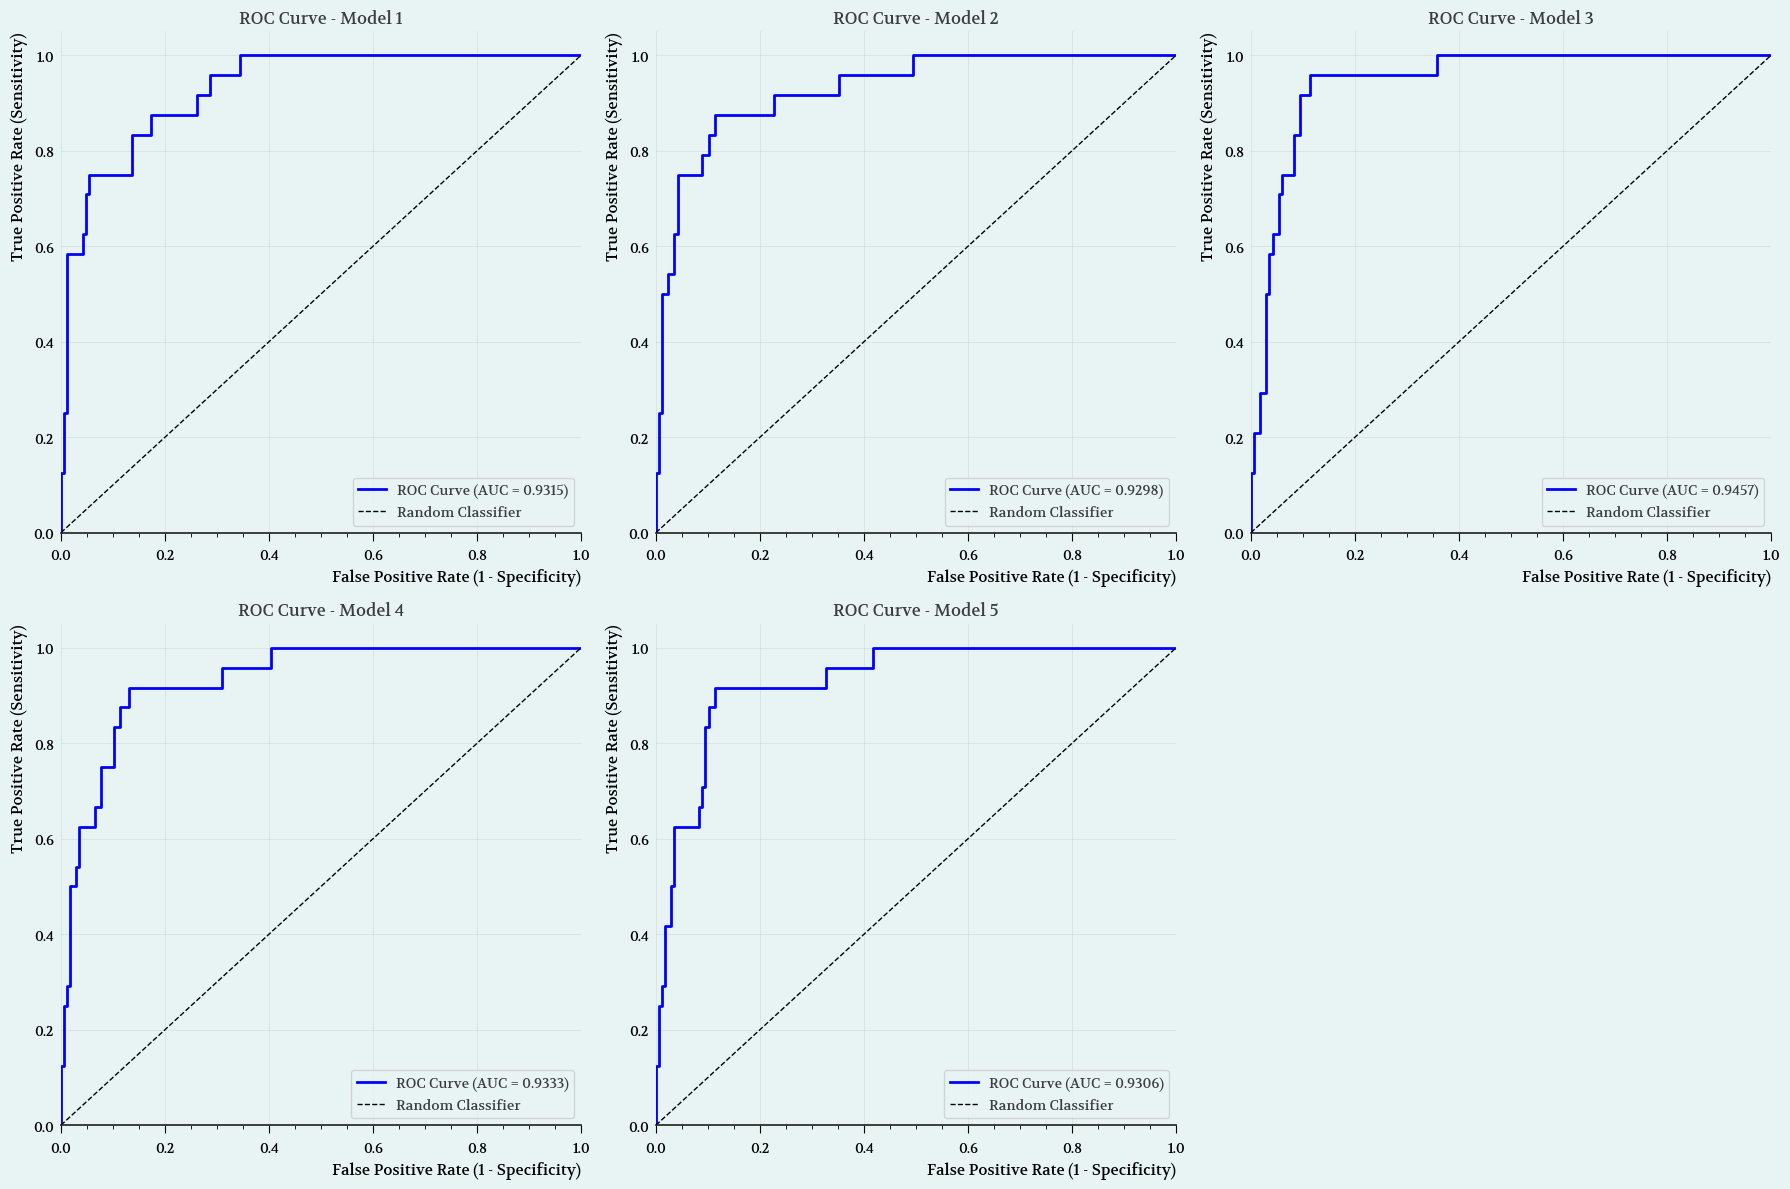

Area Under the Curve (AUC) for each model:
Model 1: 0.9315
Model 2: 0.9298
Model 3: 0.9457
Model 4: 0.9333
Model 5: 0.9306


In [15]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

models = [model1, model2, model3, model4, model5]
model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5']

for idx, (model, name) in enumerate(zip(models, model_names)):

    predictions = model.predict()
    actual = model.model.endog

    fpr, tpr, thresholds = roc_curve(actual, predictions)
    roc_auc = auc(fpr, tpr)
    

    axes[idx].plot(fpr, tpr, color='blue', linewidth=2, 
                   label=f'ROC Curve (AUC = {roc_auc:.4f})')
    axes[idx].plot([0, 1], [0, 1], color='black', linewidth=1, 
                   linestyle='--', label='Random Classifier')
    axes[idx].set_xlim([0.0, 1.0])
    axes[idx].set_ylim([0.0, 1.05])
    axes[idx].set_xlabel('False Positive Rate (1 - Specificity)', 
                         fontsize=11)
    axes[idx].set_ylabel('True Positive Rate (Sensitivity)', fontsize=11)
    axes[idx].set_title(f'ROC Curve - {name}', fontsize=12, 
                       fontweight='bold')
    axes[idx].legend(loc='lower right', fontsize=10)
    axes[idx].grid(True, alpha=0.3)

fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

print("Area Under the Curve (AUC) for each model:")
for model, name in zip(models, model_names):
    predictions = model.predict()
    actual = model.model.endog
    fpr, tpr, _ = roc_curve(actual, predictions)
    roc_auc = auc(fpr, tpr)
    print(f'{name}: {roc_auc:.4f}')

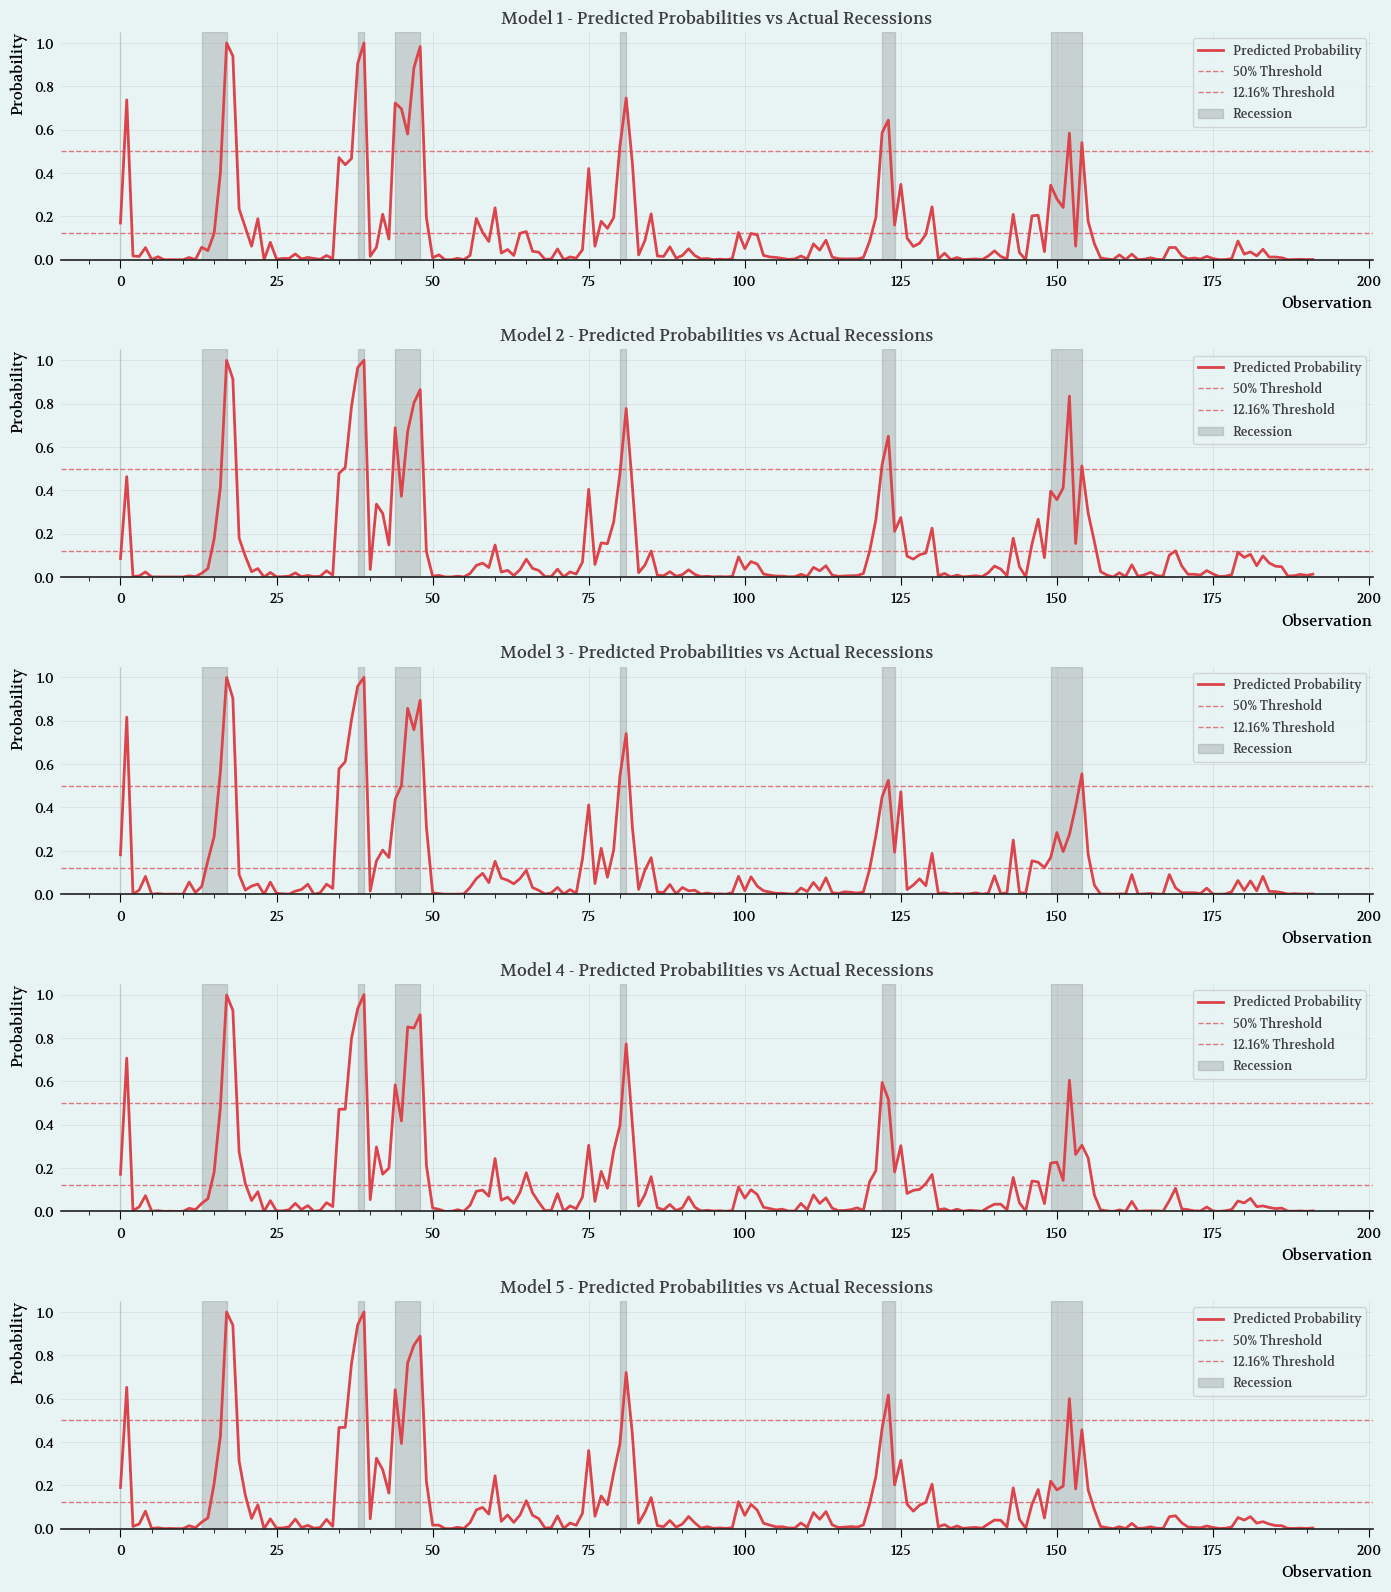

In [16]:
fig, axes = plt.subplots(5, 1, figsize=(14, 16))

models = [model1, model2, model3, model4, model5]
model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5']

for idx, (model, name) in enumerate(zip(models, model_names)):
    predictions = model.predict()
    actual = model.model.endog
    
    x = np.arange(len(predictions))
    
    axes[idx].plot(x, predictions, linewidth=2, 
                   label='Predicted Probability')
    axes[idx].axhline(y=0.5, linestyle='--', 
                     linewidth=1, alpha=0.7, label='50% Threshold')
    axes[idx].axhline(y=0.1216, linestyle='--', 
                     linewidth=1, alpha=0.7, label='12.16% Threshold')
    
    in_recession = False
    recession_start = None
    first_recession = True
    
    for i in range(len(actual)):
        if actual[i] == 1 and not in_recession:
            recession_start = i
            in_recession = True
        elif actual[i] == 0 and in_recession:
            axes[idx].axvspan(recession_start, i-1, alpha=0.3, 
                            color='gray', 
                            label='Recession' if first_recession else '')
            in_recession = False
            first_recession = False
    
    if in_recession:
        axes[idx].axvspan(recession_start, len(actual)-1, alpha=0.3, 
                        color='gray', 
                        label='Recession' if first_recession else '')
    
    axes[idx].set_xlabel('Observation', fontsize=11)
    axes[idx].set_ylabel('Probability', fontsize=11)
    axes[idx].set_title(
        f'{name} - Predicted Probabilities vs Actual Recessions', 
        fontsize=12, 
        fontweight='bold'
    )
    axes[idx].set_ylim([0, 1.05])
    axes[idx].legend(loc='upper right', fontsize=9)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout(pad=1.0)
plt.show()

In [17]:
variables = [
    'R', 'CGDP_change', 'CPIR', 'MA', 'INVR', 'HP_change', 
    'IR_change', 'ROP', 'IROR', 'LSOI_change', 'TOBQ'
]

correlation_matrix = df[variables].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
correlation_triangle = correlation_matrix.mask(mask)

correlation_triangle = correlation_triangle.round(2)

correlation_triangle = correlation_triangle.fillna('')

correlation_triangle

,R,CGDP_change,CPIR,MA,INVR,HP_change,IR_change,ROP,IROR,LSOI_change,TOBQ
R,1.000000,,,,,,,,,,
CGDP_change,-0.000000,1.000000,,,,,,,,,
CPIR,0.290000,0.010000,1.000000,,,,,,,,
MA,-0.510000,0.000000,-0.040000,1.000000,,,,,,,
INVR,-0.240000,-0.000000,0.360000,0.530000,1.000000,,,,,,
HP_change,-0.090000,-0.050000,-0.120000,0.010000,-0.140000,1.000000,,,,,
IR_change,-0.300000,-0.020000,-0.100000,0.290000,0.310000,-0.040000,1.000000,,,,
ROP,-0.030000,-0.190000,-0.550000,-0.050000,-0.290000,-0.000000,-0.050000,1.000000,,,
IROR,-0.270000,-0.100000,0.000000,0.360000,0.260000,-0.100000,0.160000,-0.060000,1.000000,,
LSOI_change,0.030000,0.070000,0.010000,-0.000000,0.050000,0.010000,0.050000,-0.020000,-0.370000,1.000000,


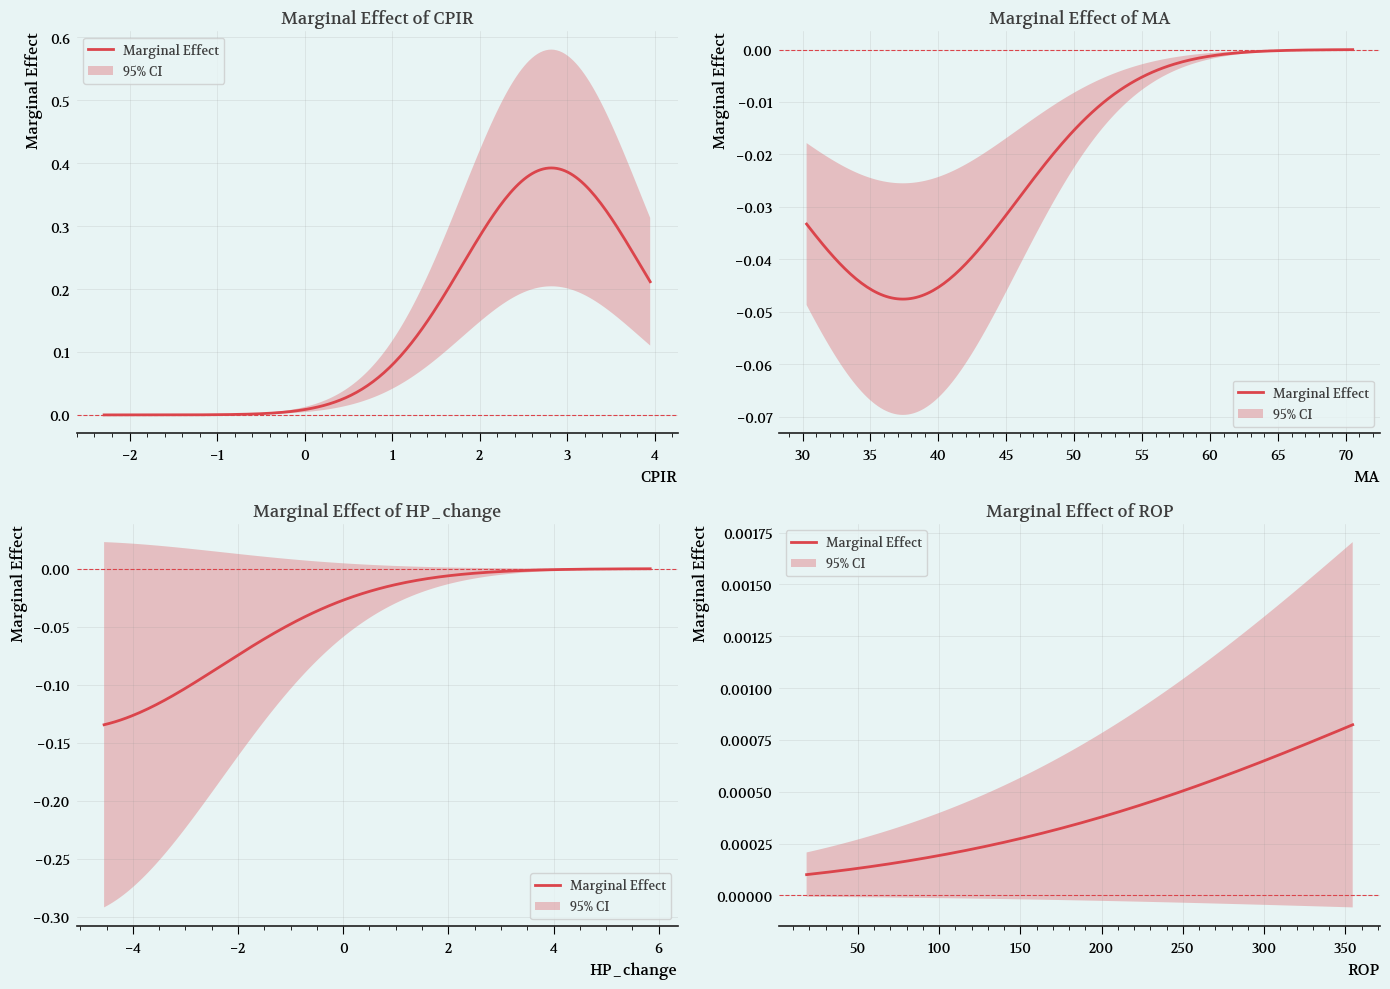

In [18]:
variables = ['CPIR', 'MA', 'HP_change', 'ROP']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, var in enumerate(variables):
    var_range = np.linspace(df[var].min(), df[var].max(), 200)
    
    marginal_effects = []
    ci_lower_list = []
    ci_upper_list = []
    
    var_idx = list(model2.model.exog_names).index(var)
    coef = model2.params.iloc[var_idx]
    
    for val in var_range:
        X_row = []
        X_row.append(1)
        for col in model2.model.exog_names[1:]:
            if col == var:
                X_row.append(val)
            else:
                X_row.append(df[col].mean())
        
        X_row = np.array(X_row)
        fitted = np.dot(X_row, model2.params.values)
        pdf_val = norm.pdf(fitted)
        
        me = coef * pdf_val
        marginal_effects.append(me)
        
        vcov = model2.cov_params()
        se = np.sqrt(vcov.iloc[var_idx, var_idx]) * pdf_val
        ci_lower_list.append(me - 1.96 * se)
        ci_upper_list.append(me + 1.96 * se)
    
    marginal_effects = np.array(marginal_effects)
    ci_lower = np.array(ci_lower_list)
    ci_upper = np.array(ci_upper_list)
    
    axes[idx].plot(var_range, marginal_effects,
                   linewidth=2, label='Marginal Effect')
    axes[idx].fill_between(var_range, ci_lower, ci_upper, 
                           alpha=0.3, label='95% CI')
    axes[idx].axhline(y=0, linestyle='--', linewidth=0.8)
    axes[idx].set_xlabel(var, fontsize=11)
    axes[idx].set_ylabel('Marginal Effect', fontsize=11)
    axes[idx].set_title(f'Marginal Effect of {var}', fontsize=12, 
                       fontweight='bold')
    axes[idx].legend(fontsize=9)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

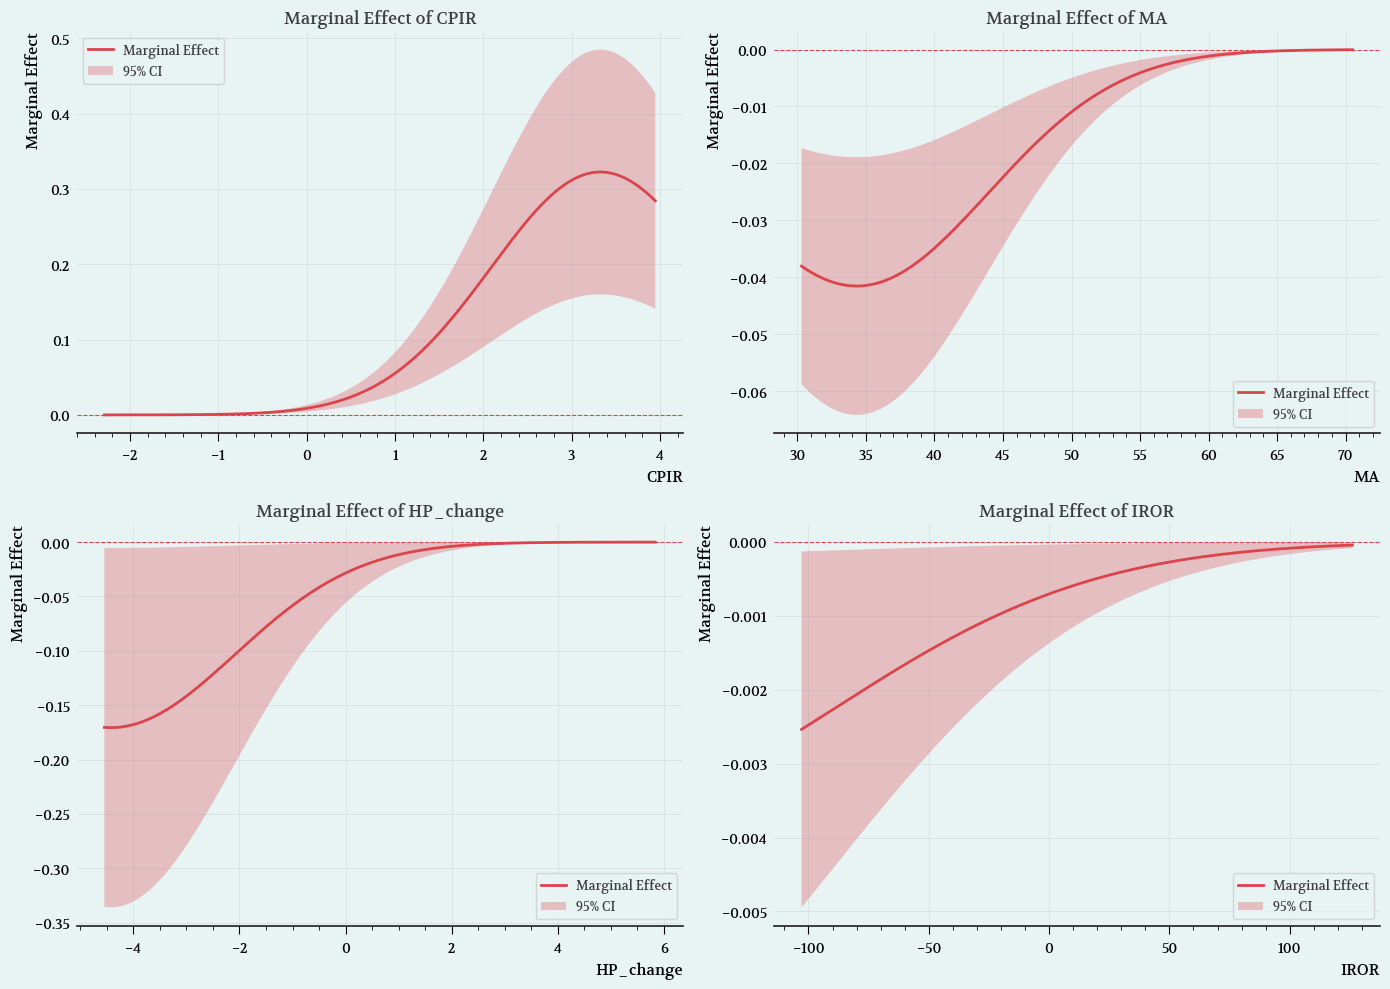

In [20]:
variables = ['CPIR', 'MA', 'HP_change', 'IROR']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, var in enumerate(variables):
    var_range = np.linspace(df[var].min(), df[var].max(), 200)
    
    marginal_effects = []
    ci_lower_list = []
    ci_upper_list = []
    
    var_idx = list(model3.model.exog_names).index(var)
    coef = model3.params.iloc[var_idx]
    
    for val in var_range:
        X_row = []
        X_row.append(1)
        for col in model3.model.exog_names[1:]:
            if col == var:
                X_row.append(val)
            else:
                X_row.append(df[col].mean())
        
        X_row = np.array(X_row)
        fitted = np.dot(X_row, model3.params.values)
        pdf_val = norm.pdf(fitted)
        
        me = coef * pdf_val
        marginal_effects.append(me)
        
        vcov = model3.cov_params()
        se = np.sqrt(vcov.iloc[var_idx, var_idx]) * pdf_val
        ci_lower_list.append(me - 1.96 * se)
        ci_upper_list.append(me + 1.96 * se)
    
    marginal_effects = np.array(marginal_effects)
    ci_lower = np.array(ci_lower_list)
    ci_upper = np.array(ci_upper_list)
    
    axes[idx].plot(var_range, marginal_effects,
                   linewidth=2, label='Marginal Effect')
    axes[idx].fill_between(var_range, ci_lower, ci_upper, 
                           alpha=0.3, label='95% CI')
    axes[idx].axhline(y=0, linestyle='--', linewidth=0.8)
    axes[idx].set_xlabel(var, fontsize=11)
    axes[idx].set_ylabel('Marginal Effect', fontsize=11)
    axes[idx].set_title(f'Marginal Effect of {var}', fontsize=12, 
                       fontweight='bold')
    axes[idx].legend(fontsize=9)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()